In [1]:
# Import Python libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [2]:
data = pd.read_csv('StackOverflow_cleaned.csv',sep=";", index_col=0,converters={"Title": literal_eval,
                                                                                 "Body": literal_eval,
                                                                                  "Tags": literal_eval})

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24044 entries, 0 to 27048
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   24044 non-null  object
 1   Body    24044 non-null  object
 2   Score   24044 non-null  int64 
 3   Tags    24044 non-null  object
dtypes: int64(1), object(3)
memory usage: 939.2+ KB


In [4]:
data

,Title,Body,Score,Tags
0,"[core, dump, linux, segmentation, fault]","[process, linux, segmentation, fault, core, dump]",237,"[linux, bash]"
1,"[php, server, mysql, server, time, zone]","[hosting, package, godaddy, network, solution,...",12,"[php, mysql]"
2,"[constraint, landscape, orientation]","[constraint, device, example, image, portrait,...",48,"[ios, cocoa-touch]"
3,"[loading, system, servicemodel, configuration,...","[net, wcf, wcf, configuration, client, applica...",64,"[c#, .net]"
4,"[xml, serialization, inherited, type]","[question, object, model, xml, problem, quelle...",86,[c#]
...,...,...,...,...
27043,"[python, process, pdf, report, chart]","[database, survey, university, professor, pyth...",41,"[python, pandas]"
27044,"[network, connection, type, android, pie]","[android, pie, request, encryption, default, s...",192,"[java, android]"
27045,"[react, router, position, component]","[react, router, card, list, card, game, detail...",28,[javascript]
27046,"[operation, library]","[project, crash, request, page, problem, docum...",46,"[ios, swift]"


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data["Title"]
y = data["Tags"]

vectorizer = TfidfVectorizer(analyzer="word",
                             max_df=.6,
                             min_df=0.005,
                             tokenizer=None,
                             preprocessor=' '.join,
                             stop_words=None,
                             lowercase=False)


vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)


In [6]:
X_tfidf.shape

(24044, 136)

In [7]:
X_tfidf

<24044x136 sparse matrix of type '<class 'numpy.float64'>'
	with 37006 stored elements in Compressed Sparse Row format>

In [8]:
def plot_top_words(model, feature_names, 
                   n_top_words, nb_topic_plot, title):
    """Function for displaying the plots of the 
    best x words representative of the categories of NMF.

    Parameters
    ----------------------------------------
    model : NMF model
        Fitted model of NMF to plot
    feature_names : array
        Categories result of the vectorizer (TFIDF ...)
    n_top_words : int
        Number of words for each topic.
    title : string
        Title of the plot.
    ----------------------------------------
    """
    rows = int(nb_topic_plot/6)
    fig, axes = plt.subplots(rows, 6, 
                             figsize=(30, rows*10), 
                             sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        if(topic_idx < nb_topic_plot):
            top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            weights = topic[top_features_ind]

            ax = axes[topic_idx]
            bartopic = ax.barh(top_features, weights, height=0.7)
            bartopic[0].set_color('#f48023')
            ax.set_title(f'Topic {topic_idx +1}',
                         fontdict={'fontsize': 30})
            ax.invert_yaxis()
            ax.tick_params(axis='both', which='major', labelsize=20)
            for i in 'top right left'.split():
                ax.spines[i].set_visible(False)
            fig.suptitle(title, fontsize=36, color="#641E16")

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

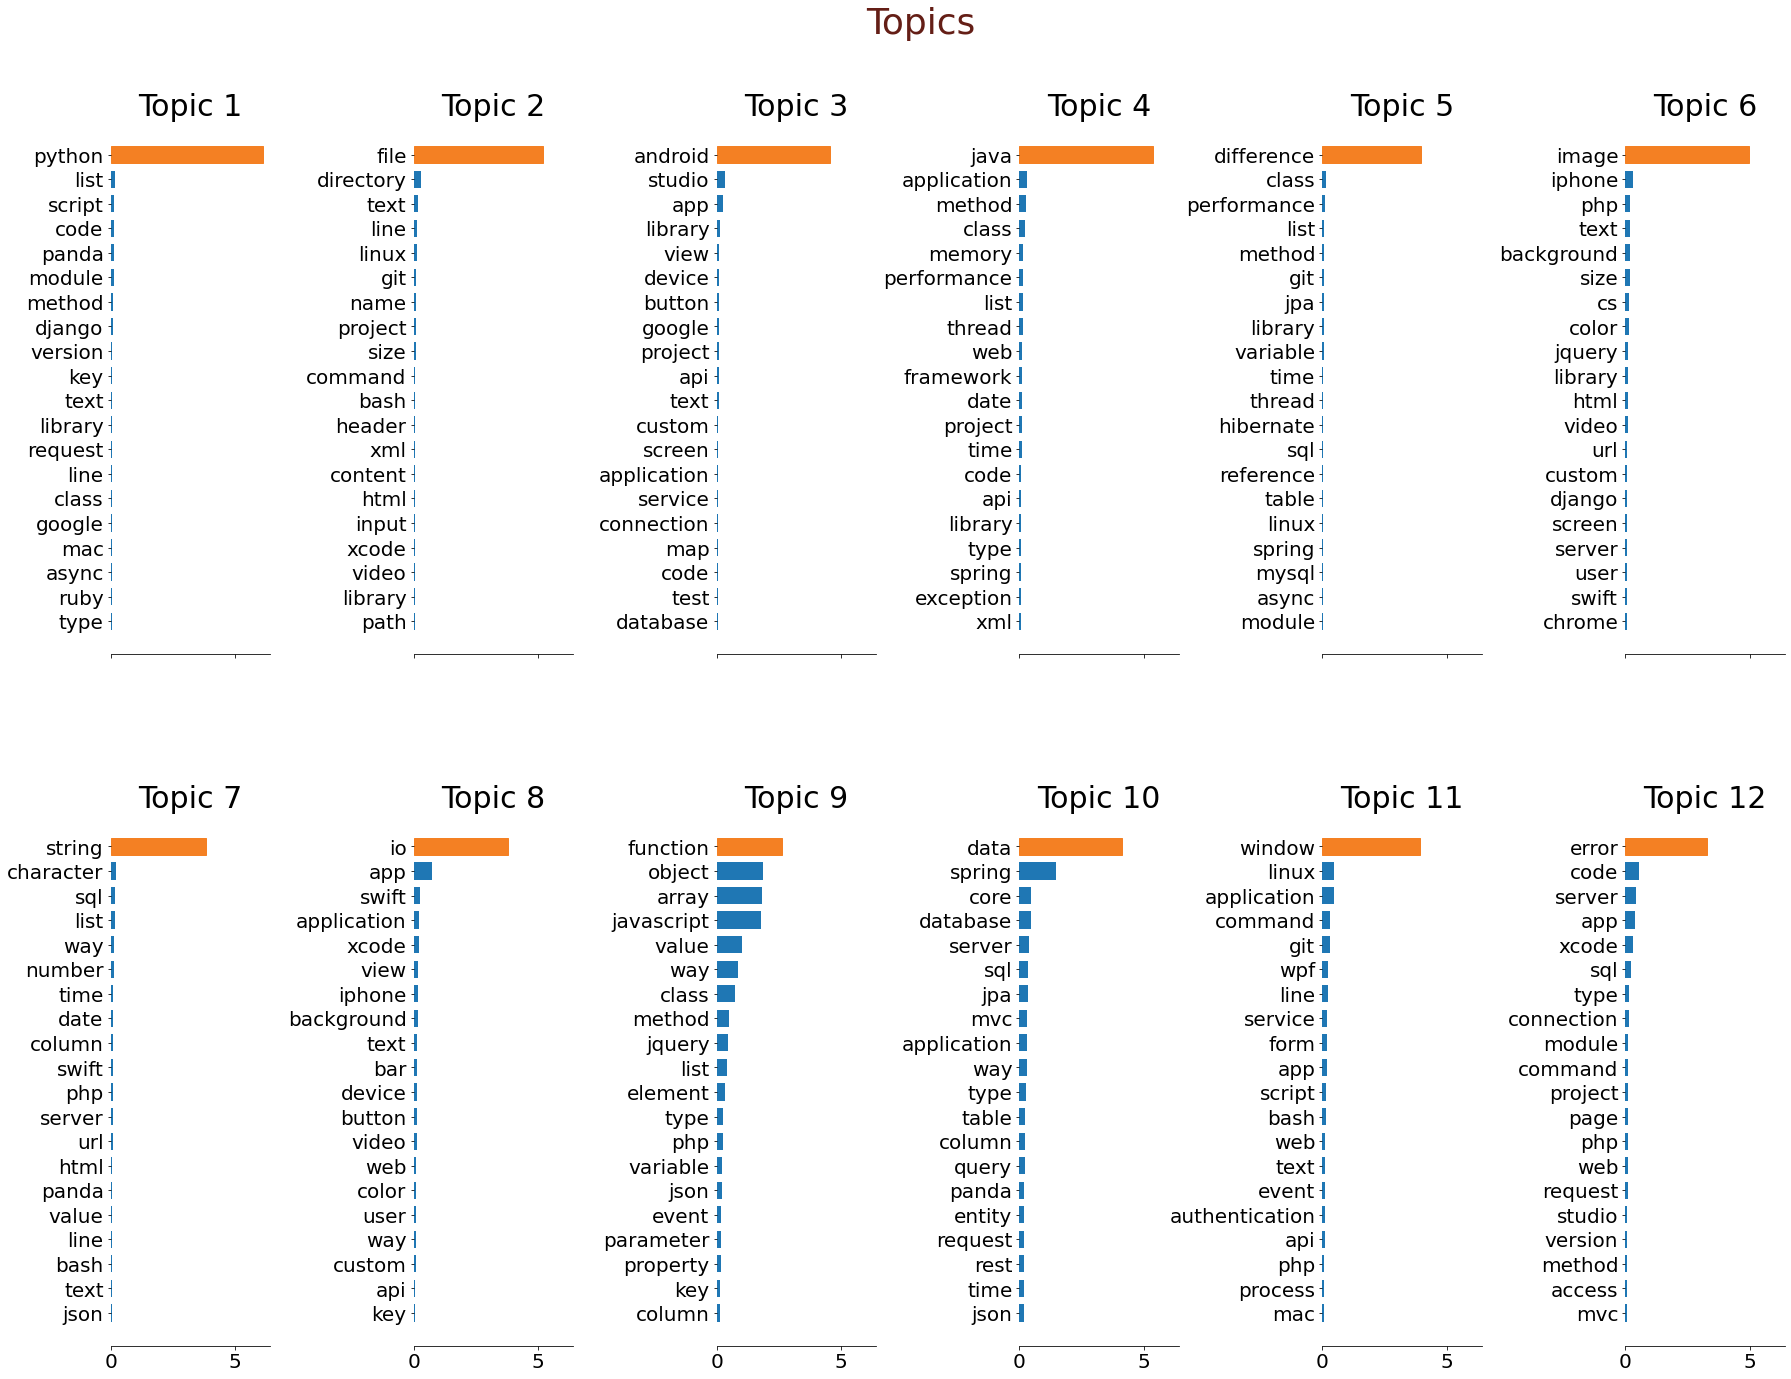

In [9]:
# Define number of topics to test
n_topics = 12

from sklearn.decomposition import NMF
full_nmf = NMF(n_components=n_topics,
               init='nndsvd',
               random_state=8)

full_nmf.fit(X_tfidf)

ff_feature_names = vectorizer.get_feature_names_out()
plot_top_words(full_nmf, ff_feature_names, 20, 12,'Topics')

Matrices de tags/topic + evaluation :